In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding = ('ISO-8859-1'))

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.duplicated().sum()

403

1. Data Cleaning
2. EDA (Exploratory Data Analysis)
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Website
8. Deploy

### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#Drop last 3 columns for better Understanding 

df.drop(columns = ['Unnamed: 2', "Unnamed: 3", 'Unnamed: 4'], inplace = True)

In [8]:
df.sample(5)

,v1,v2
1685,ham,Cramps stopped. Going back to sleep
3811,ham,Yep then is fine 7.30 or 8.30 for ice age.
3740,spam,2/2 146tf150p
5353,ham,Guai... ÌÏ shd haf seen him when he's naughty....
942,spam,How about getting in touch with folks waiting ...


In [9]:
#renaming the columns
df.rename(columns = {'v1' : "target", 'v2': "text"}, inplace =True)

In [10]:
df.sample(5)

,target,text
3036,ham,Cos darren say Ì_ considering mah so i ask Ì_...
2021,ham,"I don't have anybody's number, I still haven't..."
1233,ham,Lol ok. I'll snatch her purse too.
798,ham,Ok i msg u b4 i leave my house.
2590,ham,Lol I have to take it. member how I said my au...


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [12]:
#Changing the target (spam or ham) to digits
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head() #it gives spam to 1 and ham to 0

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#searching for missing value

df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#checking for duplicate values
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep = 'first')

In [18]:
df.shape

(5169, 2)

In [19]:
df = df.reset_index()

In [20]:
df.head()

,index,target,text
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

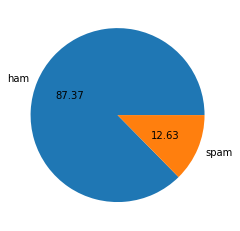

In [23]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

Data is imbalanced

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_chars'] = df['text'].apply(len) 

In [26]:
df.head()

,index,target,text,num_chars
0,0,0,"Go until jurong point, crazy.. Available only ...",111
1,1,0,Ok lar... Joking wif u oni...,29
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,3,0,U dun say so early hor... U c already then say...,49
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
df.head()

,index,target,text,num_chars,num_words
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,1,0,Ok lar... Joking wif u oni...,29,8
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,3,0,U dun say so early hor... U c already then say...,49,13
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,index,target,text,num_chars,num_words,num_sentences
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,0,Ok lar... Joking wif u oni...,29,8,2
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,3,0,U dun say so early hor... U c already then say...,49,13,1
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df.describe()

,index,target,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000
mean,2734.699362,0.126330,78.977945,18.455407,1.961308
std,1613.241267,0.332253,58.236293,13.322448,1.432583
min,0.000000,0.000000,2.000000,1.000000,1.000000
25%,1331.000000,0.000000,36.000000,9.000000,1.000000
50%,2703.000000,0.000000,60.000000,15.000000,1.000000
75%,4129.000000,0.000000,117.000000,26.000000,2.000000
max,5571.000000,1.000000,910.000000,220.000000,38.000000


In [32]:
#spam
df[df['target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
#ham
df[df['target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
import seaborn as sns

<AxesSubplot:xlabel='num_chars', ylabel='Count'>

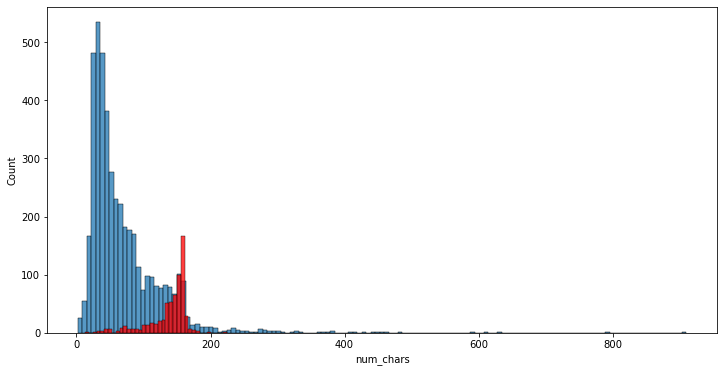

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'], color = 'red')

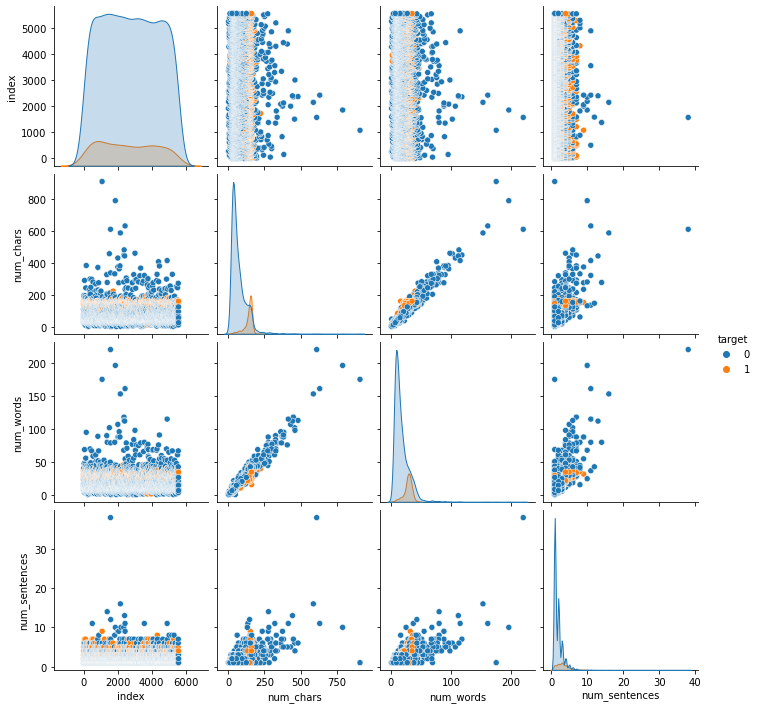

In [36]:
sns.pairplot(df, hue = 'target')

In [37]:
df.corr() #correlation among the columns

,index,target,num_chars,num_words,num_sentences
index,1.000000,-0.031256,-0.035226,-0.029728,-0.019682
target,-0.031256,1.000000,0.384717,0.262969,0.267602
num_chars,-0.035226,0.384717,1.000000,0.965784,0.626118
num_words,-0.029728,0.262969,0.965784,1.000000,0.680882
num_sentences,-0.019682,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

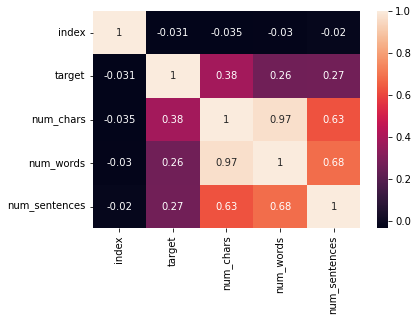

In [38]:
sns.heatmap(df.corr(), annot = True)

### 3. Data Preprocessing

* Lower case
* Tokenization
* Removing Special Characters
* Removing Stop Words and Punctuation
* Stemming

In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


'danc'

In [40]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

stopwords.words('english')


printing the stopwords [i, me, my, myself...etc]

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.tail(5)

,index,target,text,num_chars,num_words,num_sentences,transformed_text
5164,5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5165,5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5166,5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5167,5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5168,5571,0,Rofl. Its true to its name,26,7,2,rofl true name


In [50]:
pip install wordcloud

In [51]:
from wordcloud import WordCloud

In [52]:
wc = WordCloud(width = 500, height= 500, min_font_size=10, background_color='white')

In [53]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

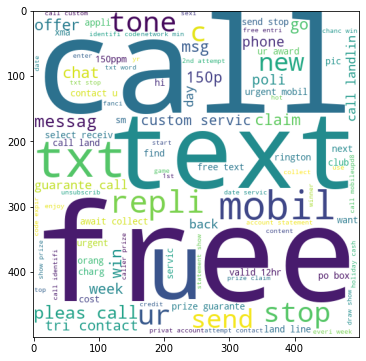

In [54]:
plt.figure(figsize=(12, 6))
plt.imshow(spam_wc)

In [55]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))

In [56]:
df.head()

,index,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [58]:
len(spam_corpus)

9939

In [59]:
from collections import Counter

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


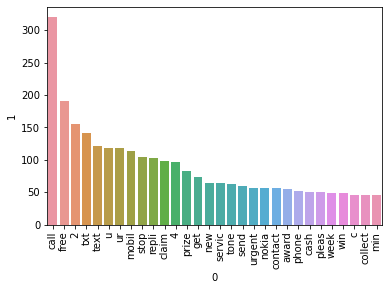

In [60]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [61]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [62]:
len(ham_corpus)

35402

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


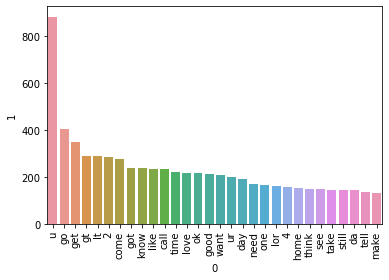

In [63]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [64]:
df.head()

,index,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             5169 non-null   int64 
 1   target            5169 non-null   int32 
 2   text              5169 non-null   object
 3   num_chars         5169 non-null   int64 
 4   num_words         5169 non-null   int64 
 5   num_sentences     5169 non-null   int64 
 6   transformed_text  5169 non-null   object
dtypes: int32(1), int64(4), object(2)
memory usage: 262.6+ KB




### 4. Model Building

In [66]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [67]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [68]:
X.shape

(5169, 6708)

In [69]:
y = df['target'].values

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 2)

In [72]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [74]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In [75]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [76]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [77]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
# from xgboost import XGBClassifier 

In [80]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
adc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc  = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
# xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [81]:
clfs = {
	'SVC' : svc,
	# 'KN' : knc,
	# 'NB' : mnb,
	# 'DT' : dtc,
	'LR' : lrc,
	# 'RF' : rfc,
	# 'AdaBoost' : adc,
	# 'BgC' : bc,
	# 'ETC' : etc,
# 	'GBDT' : gbdt,
# 	'xgb' : xgb
}

In [82]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [83]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9303675048355899, 0.7661290322580645)

In [84]:
accu_scores = []
preci_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

  print("For", name)
  print("Accuracy -", current_accuracy)
  print("Precision - ", current_precision)

  accu_scores.append(current_accuracy)
  preci_scores.append(current_precision)

For SVC
Accuracy - 0.9303675048355899
Precision -  0.7661290322580645
For LR
Accuracy - 0.9709864603481625
Precision -  0.9736842105263158
For GBDT
Accuracy - 0.9439071566731141
Precision -  0.9444444444444444


In [85]:
performance_df = pd.DataFrame({'Algo' : clfs.keys(), 'Accuracy': accu_scores, 'Precision': preci_scores})

In [86]:
performance_df

,Algo,Accuracy,Precision
0,SVC,0.930368,0.766129
1,LR,0.970986,0.973684
2,GBDT,0.943907,0.944444


In [87]:
performance_df.sort_values('Accuracy', ascending = False)

,Algo,Accuracy,Precision
1,LR,0.970986,0.973684
2,GBDT,0.943907,0.944444
0,SVC,0.930368,0.766129


In [88]:
performance_df.sort_values('Precision', ascending = False)

,Algo,Accuracy,Precision
1,LR,0.970986,0.973684
2,GBDT,0.943907,0.944444
0,SVC,0.930368,0.766129


In [89]:
perf_df1 = pd.melt(performance_df, id_vars = "Algo")
value = preci_scores

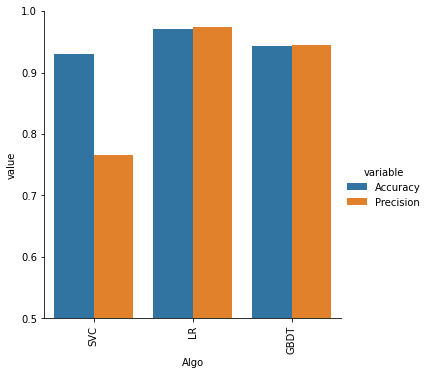

In [90]:
sns.catplot(x = 'Algo', y = 'value', hue='variable', data = perf_df1, kind = 'bar', height=5)

plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

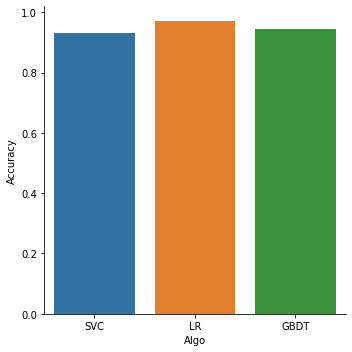

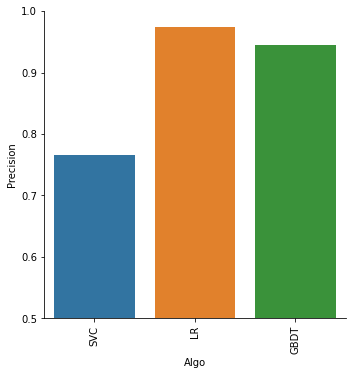

In [91]:
sns.catplot(x = 'Algo', y = 'Accuracy', data = performance_df, kind = 'bar', height=5)
sns.catplot(x = 'Algo', y = 'Precision', data = performance_df, kind = 'bar', height=5)

plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

*Model Improve*
1. Change the max_features parameter of TFIDF

In [92]:
#Voting Classifier

svc = SVC(kernel ='sigmoid', gamma = 1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [93]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [94]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [95]:
y_pred = voting.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))

Accuracy 0.9816247582205029
Precision 0.976


In [98]:
import pickle

In [99]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))